In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import ipywidgets as widgets
from IPython.display import display
import warnings
import json

In [2]:
# Settings
sns.set_style("whitegrid")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
warnings.filterwarnings("ignore")

# 🔍 Data Observation

In [3]:
# Load Data
comp_path = '/kaggle/input/MABe-mouse-behavior-detection'
train_df = pd.read_csv(os.path.join(comp_path, 'train.csv'))
test_df = pd.read_csv(os.path.join(comp_path, 'test.csv'))
ss_df = pd.read_csv(os.path.join(comp_path, 'sample_submission.csv'))
df_dict = {
    "Training data": train_df,
    "Testing data": test_df,
    "Sample submission": ss_df,
}

test_tracking_dir = os.path.join(comp_path, 'test_tracking')
train_annotation_dir = os.path.join(comp_path, 'train_annotation')

# Example data to check
train_annotation_example = pd.read_parquet('/kaggle/input/MABe-mouse-behavior-detection/train_annotation/AdaptableSnail/1212811043.parquet')
train_tracking_example = pd.read_parquet(r'/kaggle/input/MABe-mouse-behavior-detection/train_tracking/AdaptableSnail/1212811043.parquet')

## train.csv

In [4]:
display(train_df)

,lab_id,video_id,mouse1_strain,mouse1_color,mouse1_sex,mouse1_id,mouse1_age,mouse1_condition,mouse2_strain,mouse2_color,...,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,arena_shape,arena_type,body_parts_tracked,behaviors_labeled,tracking_method
0,AdaptableSnail,44566106,CD-1 (ICR),white,male,10.0,8-12 weeks,wireless device,CD-1 (ICR),white,...,16.0,1228,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
1,AdaptableSnail,143861384,CD-1 (ICR),white,male,3.0,8-12 weeks,NaN,CD-1 (ICR),white,...,9.7,968,608,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
2,AdaptableSnail,209576908,CD-1 (ICR),white,male,7.0,8-12 weeks,NaN,CD-1 (ICR),white,...,16.0,1266,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
3,AdaptableSnail,278643799,CD-1 (ICR),white,male,11.0,8-12 weeks,wireless device,CD-1 (ICR),white,...,16.0,1224,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
4,AdaptableSnail,351967631,CD-1 (ICR),white,male,14.0,8-12 weeks,NaN,CD-1 (ICR),white,...,16.0,1204,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,UppityFerret,1610683375,C57Bl/6N,black,male,8.0,8 weeks,csds,CD1,white,...,13.0,664,572,38.0,38.0,circular,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""hip_...","[""mouse1,mouse2,reciprocalsniff"", ""mouse1,mous...",DeepLabCut
8785,UppityFerret,1725214092,C57Bl/6N,black,male,27.0,8 weeks,NaN,CD1,white,...,12.8,608,576,38.0,38.0,circular,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""hip_...","[""mouse1,mouse2,intromit"", ""mouse1,mouse2,moun...",DeepLabCut
8786,UppityFerret,1960237444,C57Bl/6N,black,male,14.0,8 weeks,csds,CD1,white,...,12.5,592,576,38.0,38.0,circular,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""hip_...","[""mouse1,mouse2,reciprocalsniff"", ""mouse1,mous...",DeepLabCut
8787,UppityFerret,2045808129,C57Bl/6N,black,male,12.0,8 weeks,csds,CD1,white,...,12.5,624,572,38.0,38.0,circular,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""hip_...","[""mouse1,mouse2,reciprocalsniff"", ""mouse1,mous...",DeepLabCut


In [5]:
print(train_df.iloc[0])

lab_id                                                   AdaptableSnail
video_id                                                       44566106
mouse1_strain                                                CD-1 (ICR)
mouse1_color                                                      white
mouse1_sex                                                         male
mouse1_id                                                          10.0
mouse1_age                                                   8-12 weeks
mouse1_condition                                        wireless device
mouse2_strain                                                CD-1 (ICR)
mouse2_color                                                      white
mouse2_sex                                                         male
mouse2_id                                                          24.0
mouse2_age                                                   8-12 weeks
mouse2_condition                                        wireless

In [6]:
train_df["body_parts_tracked"].iloc[0]

'["body_center", "ear_left", "ear_right", "headpiece_bottombackleft", "headpiece_bottombackright", "headpiece_bottomfrontleft", "headpiece_bottomfrontright", "headpiece_topbackleft", "headpiece_topbackright", "headpiece_topfrontleft", "headpiece_topfrontright", "lateral_left", "lateral_right", "neck", "nose", "tail_base", "tail_midpoint", "tail_tip"]'

In [7]:
train_df["behaviors_labeled"].iloc[0]

'["mouse1,mouse2,approach", "mouse1,mouse2,attack", "mouse1,mouse2,avoid", "mouse1,mouse2,chase", "mouse1,mouse2,chaseattack", "mouse1,mouse2,submit", "mouse1,mouse3,approach", "mouse1,mouse3,attack", "mouse1,mouse3,avoid", "mouse1,mouse3,chase", "mouse1,mouse3,chaseattack", "mouse1,mouse3,submit", "mouse1,mouse4,approach", "mouse1,mouse4,attack", "mouse1,mouse4,avoid", "mouse1,mouse4,chase", "mouse1,mouse4,chaseattack", "mouse1,mouse4,submit", "mouse1,self,rear", "mouse2,mouse1,approach", "mouse2,mouse1,attack", "mouse2,mouse1,avoid", "mouse2,mouse1,chase", "mouse2,mouse1,chaseattack", "mouse2,mouse1,submit", "mouse2,mouse3,approach", "mouse2,mouse3,attack", "mouse2,mouse3,avoid", "mouse2,mouse3,chase", "mouse2,mouse3,chaseattack", "mouse2,mouse3,submit", "mouse2,mouse4,approach", "mouse2,mouse4,attack", "mouse2,mouse4,avoid", "mouse2,mouse4,chase", "mouse2,mouse4,chaseattack", "mouse2,mouse4,submit", "mouse2,self,rear", "mouse3,mouse1,approach", "mouse3,mouse1,attack", "mouse3,mouse1

## train_annotation

In [26]:
# lab_id and video_id of train_df.iloc[0] 
index = 0
path_lab_and_video = train_df['lab_id'].iloc[index] + "/" + str(train_df['video_id'].iloc[index]) + ".parquet"

In [68]:
# Annotation data for train_df.iloc[0] 

# train_annotation/{lab_id}/{video_id}.parquet
path_for_annotation = comp_path + "/train_annotation/" + path_lab_and_video

df_sample_annotation = pd.read_parquet(path_for_annotation)
df_sample_annotation.head(20)

,agent_id,target_id,action,start_frame,stop_frame
0,2,2,rear,4,139
1,4,2,avoid,13,52
2,4,4,rear,121,172
3,3,3,rear,156,213
4,4,4,rear,208,261
5,3,3,rear,263,332
6,1,1,rear,299,308
7,1,1,rear,322,364
8,3,3,rear,375,393
9,1,1,rear,502,520


## train_tracking

In [29]:
# Tracking data for train_df.iloc[0] 

path_for_tracking = comp_path + "/train_tracking/" + path_lab_and_video

df_sample_tracking = pd.read_parquet(path_for_tracking)
df_sample_tracking

,video_frame,mouse_id,bodypart,x,y
0,0,1,body_center,1161.543945,523.112976
1,0,1,ear_right,1146.305054,587.619995
2,0,1,headpiece_bottomfrontright,1163.192017,588.580017
3,0,1,headpiece_topbackright,1192.211060,558.434998
4,0,1,headpiece_topfrontleft,1191.343994,620.625977
...,...,...,...,...,...
1087653,18450,4,lateral_left,250.681000,646.434021
1087654,18450,4,lateral_right,297.471985,679.210022
1087655,18450,4,tail_base,265.600006,688.062012
1087656,18450,4,tail_midpoint,263.371002,748.155029


# 📊 Data Exploration

## Visualization

In [107]:
# Annotation data for train_df.iloc[500] 
# row = 500
# path_lab_and_video = train_df['lab_id'].iloc[row] + "/" + str(train_df['video_id'].iloc[row]) + ".parquet"
# path_for_annotation = comp_path + "/train_annotation/" + path_lab_and_video
# df_sample_annotation = pd.read_parquet(path_for_annotation)
# df_sample_annotation.head(10)

# Ex:
# sniff (54,728)
# sniff (939, 1140)
# mount (1997, 2109)

In [32]:
class Visualizer():
    """
    A class for visualizing single frames of mouse videos.
    Thank you for https://www.kaggle.com/code/ambrosm/mabe-eda-which-makes-sense
    """
    paws = ['forepaw_left', 'forepaw_right', 'hindpaw_left', 'hindpaw_right']
    head = ['ear_left', 'ear_right', 'nose', 'ear_left']

    def __init__(self, train):
        """Initialize a visualizer.
        
        Parameters:
        train: pandas DataFrame read from train.csv
        """
        self.train = train

    def load_video(self, train_idx):
        """Load the specified video into the visualizer"""
        self.train_idx = train_idx
        lab_id = self.train.iloc[train_idx].lab_id
        video_id = self.train.iloc[train_idx].video_id
        path = f"/kaggle/input/MABe-mouse-behavior-detection/train_tracking/{lab_id}/{video_id}.parquet"
        self.video_name = path.split('/')[-1].split('.')[0]
        self.vid = pd.read_parquet(path)
        try:
            self.annot = pd.read_parquet(path.replace('train_tracking', 'train_annotation'))
        except FileNotFoundError:
            self.annot = None
        self.pvid = self.vid.pivot(columns=['mouse_id', 'bodypart'], index='video_frame', values=['x', 'y'])
        self.bodyparts = set(self.pvid.loc[self.pvid.index[0], ('x', 1)].index)
        # print(self.bodyparts)
        self.n_mouses = len(np.unique(self.pvid.columns.get_level_values('mouse_id')))

    def __len__(self):
        """Frame count of video"""
        return len(self.pvid)

    def plot_frame(self, frame_idx):
        """Plot the selected frame of the previously loaded video"""
        video_frame = self.pvid.index[frame_idx]
        if (self.pvid.loc[video_frame] == 0).all():
            print(f"{self.train_idx}.{frame_idx} is empty.")
            return
        for mouse, color in enumerate(['g', 'b', 'orange', 'brown'][:self.n_mouses]):
            mouse_id = mouse + 1
            mx = self.pvid.loc[video_frame, ('x', mouse_id)].copy()
            my = self.pvid.loc[video_frame, ('y', mouse_id)].copy()

            # Plot the head
            # Every mouse has ear_left and ear_right
            if 'nose' in mx.index and mx['nose'] != 0:
                plt.fill(mx[self.head], my[self.head], color=color, alpha=0.5)
                plt.scatter([mx['nose']], [my['nose']], s=100, color=color)
            else:
                plt.plot(mx[['ear_left', 'ear_right']], my[['ear_left', 'ear_right']], color=color)
            if 'head' not in mx.index:
                mx['head'] = mx[['ear_left', 'ear_right']].mean()
                my['head'] = my[['ear_left', 'ear_right']].mean()

            # Plot the body and tail
            # Every mouse has tail_base, but it can be 0
            parts_list = ['head']
            if 'neck' in mx.index and mx['neck'] != 0:
                parts_list.append('neck')
            if 'body_center' in mx.index and mx['body_center'] != 0:
                parts_list.append('body_center')
            if mx['tail_base'] != 0:
                parts_list.append('tail_base')
            if 'tail_tip' in mx.index and mx['tail_tip'] != 0:
                parts_list.append('tail_tip')
            plt.plot(mx[parts_list], my[parts_list], color=color)

            # Plot the width of the body
            if 'lateral_right' in mx.index:
                plt.plot(mx[['lateral_right', 'lateral_left']], my[['lateral_right', 'lateral_left']], color=color)
                
            # Plot the hip
            if 'hip_right' in mx.index:
                plt.plot(mx[['hip_right', 'hip_left']], my[['hip_right', 'hip_left']], color=color)
                # Plot the paws
            if 'forepaw_left' in mx.index:
                plt.scatter(mx[self.paws], my[self.paws], color=color)

        if self.annot is not None:
            actions = set(self.annot.action[(self.annot.start_frame <= video_frame) & (video_frame <= self.annot.stop_frame)])
            if len(actions) == 0:
                actions = ''
        else:
            actions = ''
        plt.title(f'{self.train_idx}.{frame_idx} {actions}')
        plt.gca().set_aspect('equal')
        plt.show()

visualizer = Visualizer(train_df)

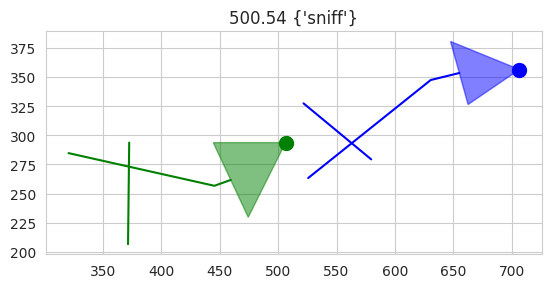

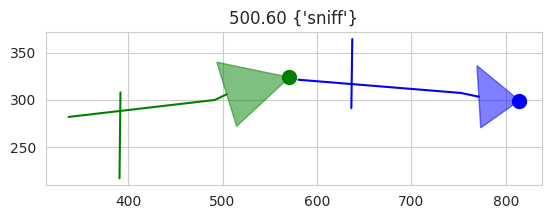

In [108]:
# sniff (54,728)
# sniff (939, 1140)
# mount (1997, 2109)

# train_df.iloc[500], sniff
visualizer.load_video(500)
visualizer.plot_frame(54)
visualizer.plot_frame(60)

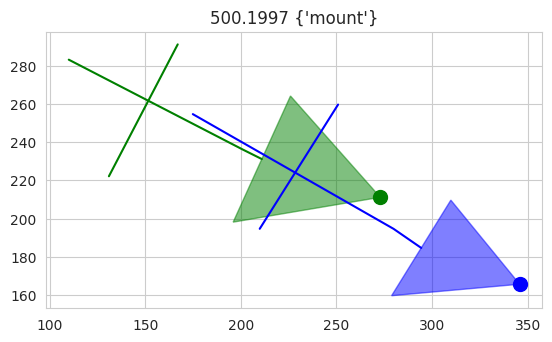

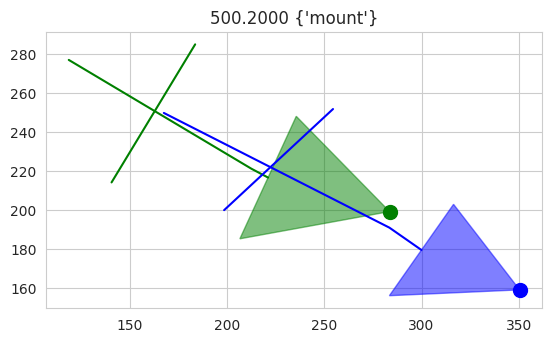

In [109]:
# train_df.iloc[500], mount
visualizer.load_video(500)
visualizer.plot_frame(1997)
visualizer.plot_frame(2000)

## NaN

In [56]:
print("Total data:", len(train_df))
print("Data with null behaviors_labeled:", train_df["behaviors_labeled"].isnull().sum())

train_df[train_df["behaviors_labeled"].isnull() == True].head()

Total data: 8789
Data with null behaviors_labeled: 7941


,lab_id,video_id,mouse1_strain,mouse1_color,mouse1_sex,mouse1_id,mouse1_age,mouse1_condition,mouse2_strain,mouse2_color,...,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,arena_shape,arena_type,body_parts_tracked,behaviors_labeled,tracking_method
681,MABe22_keypoints,189552,BTBR,black and tan,male,NaN,10-20 weeks,day 0- 08:22 (lights on),BTBR,black and tan,...,11.7,800,800,52.0,52.0,square,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""fore...",NaN,custom HRnet
682,MABe22_keypoints,301471,BTBR,black and tan,male,NaN,10-20 weeks,day 2- 16:25 (lights on),BTBR,black and tan,...,11.7,800,800,52.0,52.0,square,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""fore...",NaN,custom HRnet
683,MABe22_keypoints,302628,BTBR,black and tan,male,NaN,10-20 weeks,day 2- 18:26 (lights off),BTBR,black and tan,...,11.7,800,800,52.0,52.0,square,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""fore...",NaN,custom HRnet
684,MABe22_keypoints,1271944,C57Bl/6J,black,male,NaN,10-20 weeks,day 2- 16:20 (lights on),C57Bl/6J,black,...,11.7,800,800,52.0,52.0,square,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""fore...",NaN,custom HRnet
685,MABe22_keypoints,1396913,BTBR,black and tan,male,NaN,10-20 weeks,day 1- 04:10 (lights off),BTBR,black and tan,...,11.7,800,800,52.0,52.0,square,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""fore...",NaN,custom HRnet


## Number of videos per lab

In [57]:
# Count unique video_ids per lab_id
videos_per_lab = train_df.groupby('lab_id')['video_id'].nunique().sort_values(ascending=False)
videos_per_lab

lab_id
MABe22_keypoints        5320
MABe22_movies           2606
CalMS21_supplemental     297
CalMS21_task1            101
CalMS21_task2             76
SparklingTapir            69
JovialSwallow             52
PleasantMeerkat           36
InvincibleJellyfish       33
TranquilPanther           25
LyricalHare               24
UppityFerret              21
CRIM13                    21
ReflectiveManatee         20
ElegantMink               19
GroovyShrew               17
AdaptableSnail            17
NiftyGoldfinch            11
CautiousGiraffe           10
BoisterousParrot           8
DeliriousFly               6
Name: video_id, dtype: int64

## Count behaviors

In [58]:
lab_action_data = []

for idx, row in train_df.iterrows():
    lab_id = row['lab_id']
    try:
        behaviors_list = json.loads(row['behaviors_labeled'].replace("'", '"'))
        for behavior in behaviors_list:
            action = behavior.split(',')[-1]  # Get the action part
            lab_action_data.append({'lab_id': lab_id, 'action': action})
    except:
        pass

lab_action_df = pd.DataFrame(lab_action_data)

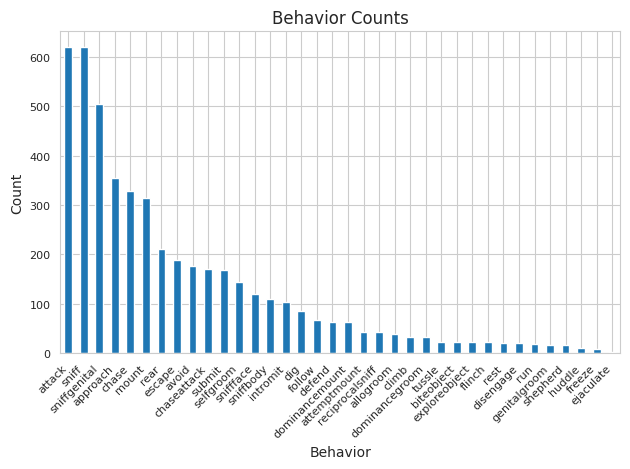

In [59]:
action_counts = lab_action_df['action'].value_counts()

plt.figure()
action_counts.plot(kind='bar', fontsize=8)
plt.xlabel("Behavior")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count")
plt.title("Behavior Counts")
plt.tight_layout()
plt.show()

In [60]:
action_counts

action
attack             621
sniff              620
sniffgenital       504
approach           354
chase              328
mount              314
rear               211
escape             189
avoid              177
chaseattack        170
submit             168
selfgroom          144
sniffface          119
sniffbody          110
intromit           103
dig                 85
follow              68
defend              64
dominancemount      63
attemptmount        42
reciprocalsniff     42
allogroom           39
climb               33
dominancegroom      33
tussle              22
biteobject          22
exploreobject       22
flinch              22
rest                21
disengage           21
run                 19
genitalgroom        17
shepherd            16
huddle              11
freeze               9
ejaculate            3
Name: count, dtype: int64

## Action Types by Lab ID

In [55]:
# Create dataframe and count occurrences
action_matrix = lab_action_df.groupby(['lab_id', 'action']).size().unstack(fill_value=0)

# Sort columns by total occurrences (descending)
column_sums = action_matrix.sum(axis=0).sort_values(ascending=False)
action_matrix = action_matrix[column_sums.index]

# Sort rows by total occurrences (descending)
row_sums = action_matrix.sum(axis=1).sort_values(ascending=False)
action_matrix = action_matrix.loc[row_sums.index]

# Replace 0 with NaN to make them appear white/empty in the heatmap
action_matrix_masked = action_matrix.replace(0, np.nan)

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(action_matrix_masked, cmap='viridis', annot=False, fmt='g',
            cbar_kws={'label': 'Number of Occurrences'},
            linewidths=0.5, linecolor='lightgray')
plt.xlabel('Action Type', fontsize=12, fontweight='bold')
plt.ylabel('Lab ID', fontsize=12, fontweight='bold')
plt.title('Action Types by Lab ID', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

NameError: name 'lab_action_df' is not defined

## Body Parts Tracked by Lab ID

Each lab used different technology to track their mice, so the specific body parts tracked may vary.

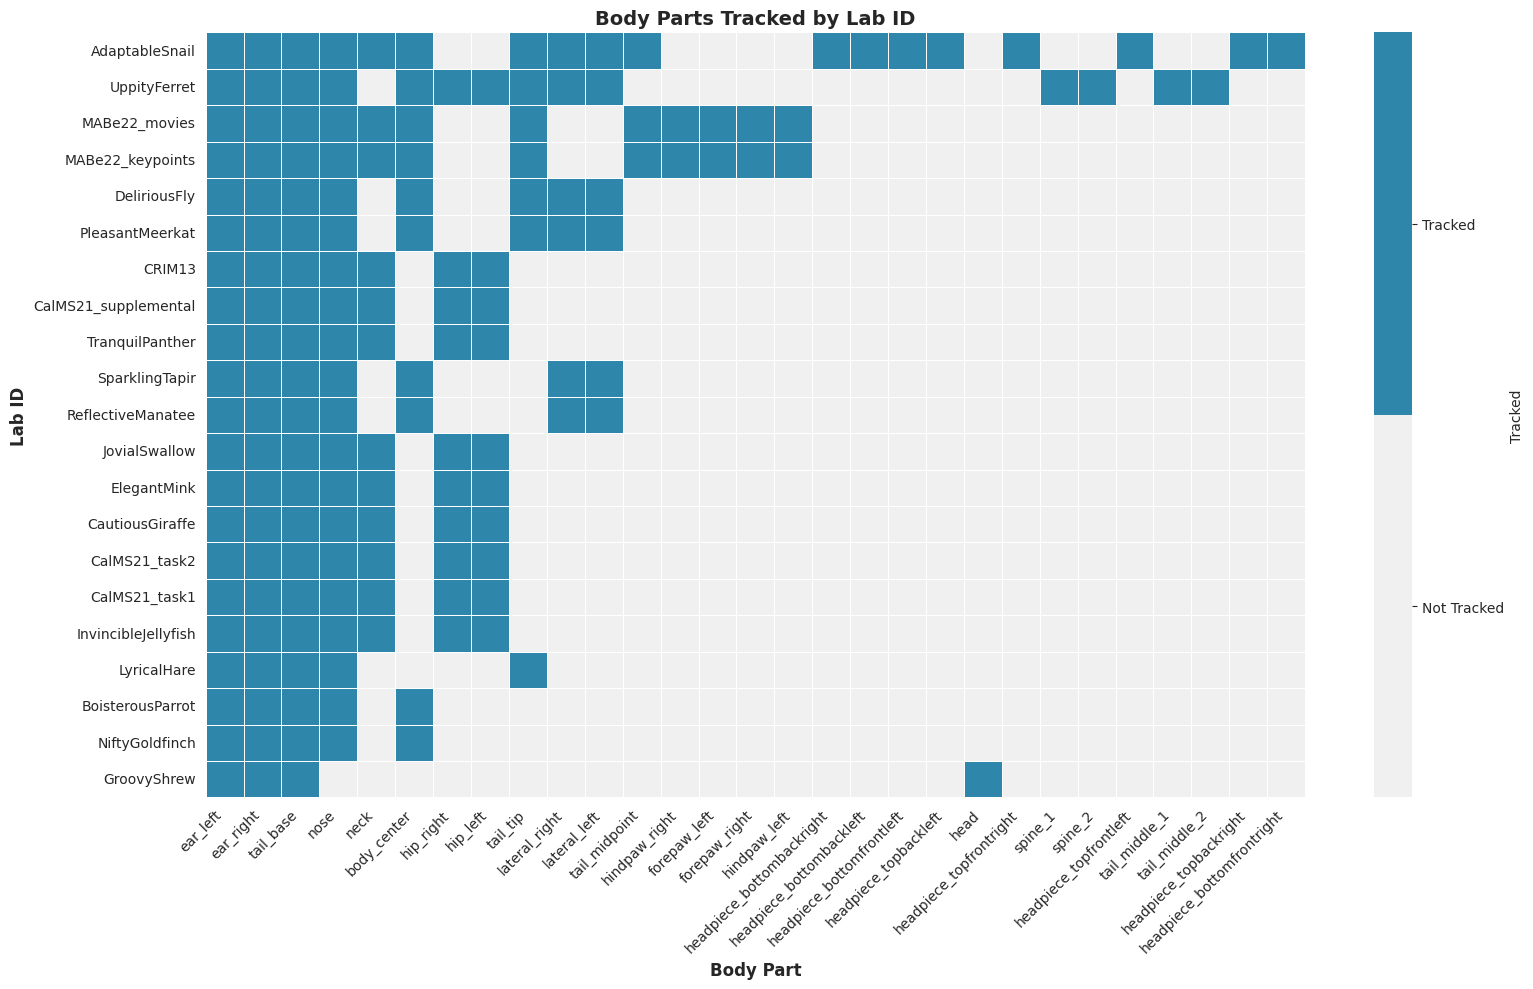

In [67]:
# Build a dataframe with lab_id and body parts
lab_bodypart_data = []

for idx, row in train_df.iterrows():
    lab_id = row['lab_id']
    try:
        body_parts_list = json.loads(row['body_parts_tracked'].replace("'", '"'))
        # Extract each body part
        for body_part in body_parts_list:
            lab_bodypart_data.append({'lab_id': lab_id, 'body_part': body_part})
    except:
        pass

# Create dataframe and get unique combinations (1 if tracked, 0 if not)
lab_bodypart_df = pd.DataFrame(lab_bodypart_data)
bodypart_matrix = lab_bodypart_df.groupby(['lab_id', 'body_part']).size().unstack(fill_value=0)

# Convert to boolean (True if tracked, False if not)
bodypart_matrix_bool = (bodypart_matrix > 0).astype(int)

# Sort columns by total occurrences (descending)
column_sums = bodypart_matrix_bool.sum(axis=0).sort_values(ascending=False)
bodypart_matrix_bool = bodypart_matrix_bool[column_sums.index]

# Sort rows by total occurrences (descending)
row_sums = bodypart_matrix_bool.sum(axis=1).sort_values(ascending=False)
bodypart_matrix_bool = bodypart_matrix_bool.loc[row_sums.index]

# Create custom colormap for binary data (white = not tracked, blue = tracked)
from matplotlib.colors import ListedColormap
colors = ['#f0f0f0', '#2E86AB']  # Light gray for 0, Blue for 1
cmap = ListedColormap(colors)

# Create heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(bodypart_matrix_bool, cmap=cmap, annot=False, fmt='d',
            cbar_kws={'label': 'Tracked', 'ticks': [0.25, 0.75]},
            linewidths=0.5, linecolor='white', vmin=0, vmax=1)

# Customize colorbar labels
colorbar = plt.gca().collections[0].colorbar
colorbar.set_ticklabels(['Not Tracked', 'Tracked'])

plt.xlabel('Body Part', fontsize=12, fontweight='bold')
plt.ylabel('Lab ID', fontsize=12, fontweight='bold')
plt.title('Body Parts Tracked by Lab ID', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Tracking Method by Lab ID

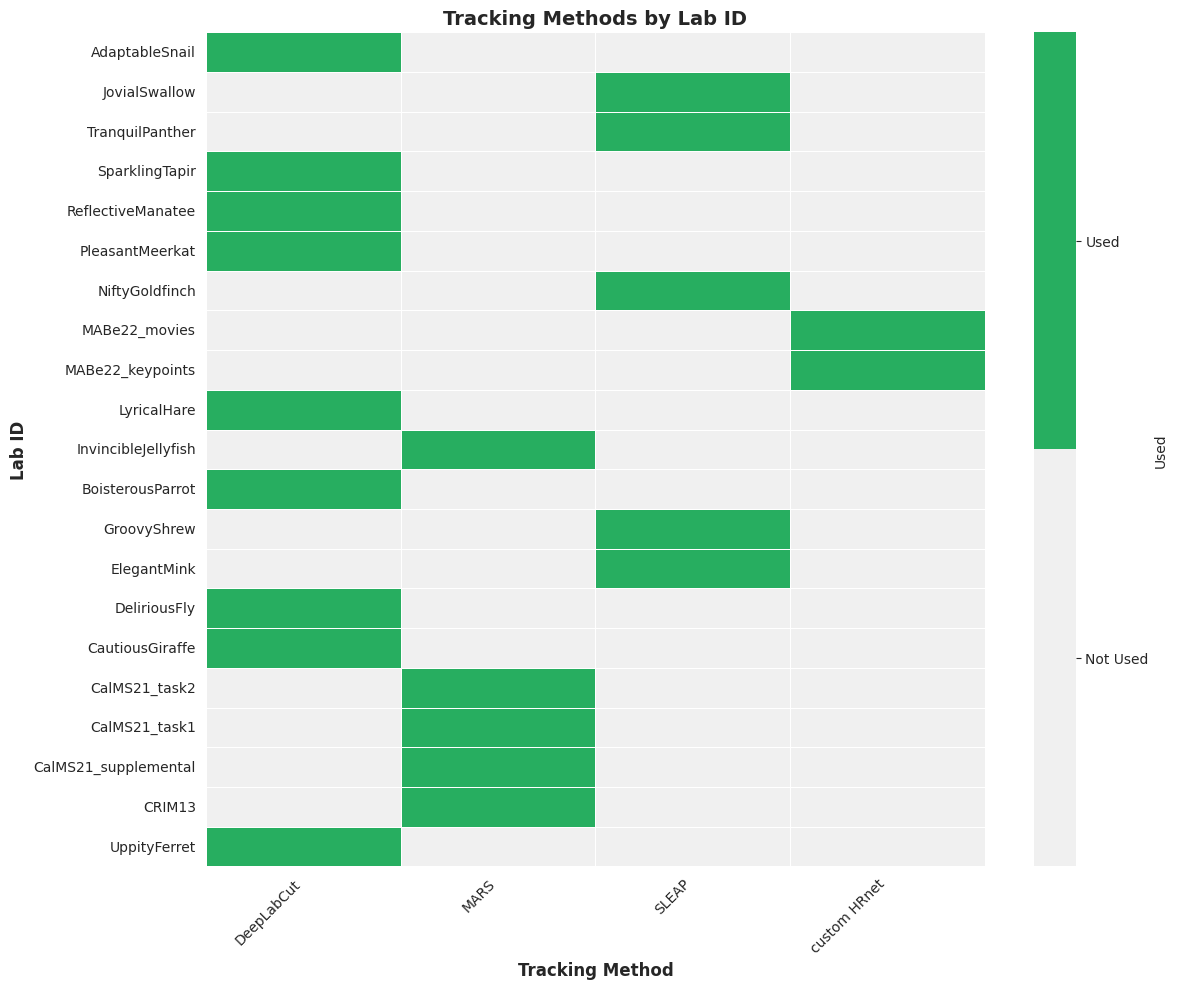

In [68]:
import json

# Get unique tracking methods per lab
tracking_by_lab = train_df.groupby('lab_id')['tracking_method'].apply(lambda x: x.unique().tolist()).to_dict()

# Create a summary dataframe
tracking_summary = train_df.groupby(['lab_id', 'tracking_method']).size().unstack(fill_value=0)

# Convert to boolean (True if used, False if not)
tracking_summary_bool = (tracking_summary > 0).astype(int)

# Sort columns by total occurrences (descending)
column_sums = tracking_summary_bool.sum(axis=0).sort_values(ascending=False)
tracking_summary_bool = tracking_summary_bool[column_sums.index]

# Sort rows by total occurrences (descending)
row_sums = tracking_summary_bool.sum(axis=1).sort_values(ascending=False)
tracking_summary_bool = tracking_summary_bool.loc[row_sums.index]

# Create custom colormap for binary data (light gray = not used, green = used)
from matplotlib.colors import ListedColormap
colors = ['#f0f0f0', '#27AE60']  # Light gray for 0, Green for 1
cmap = ListedColormap(colors)

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(tracking_summary_bool, cmap=cmap, annot=False, fmt='d',
            cbar_kws={'label': 'Used', 'ticks': [0.25, 0.75]},
            linewidths=0.5, linecolor='white', vmin=0, vmax=1)

# Customize colorbar labels
colorbar = plt.gca().collections[0].colorbar
colorbar.set_ticklabels(['Not Used', 'Used'])

plt.xlabel('Tracking Method', fontsize=12, fontweight='bold')
plt.ylabel('Lab ID', fontsize=12, fontweight='bold')
plt.title('Tracking Methods by Lab ID', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

 ## Mouse Strains by Lab ID

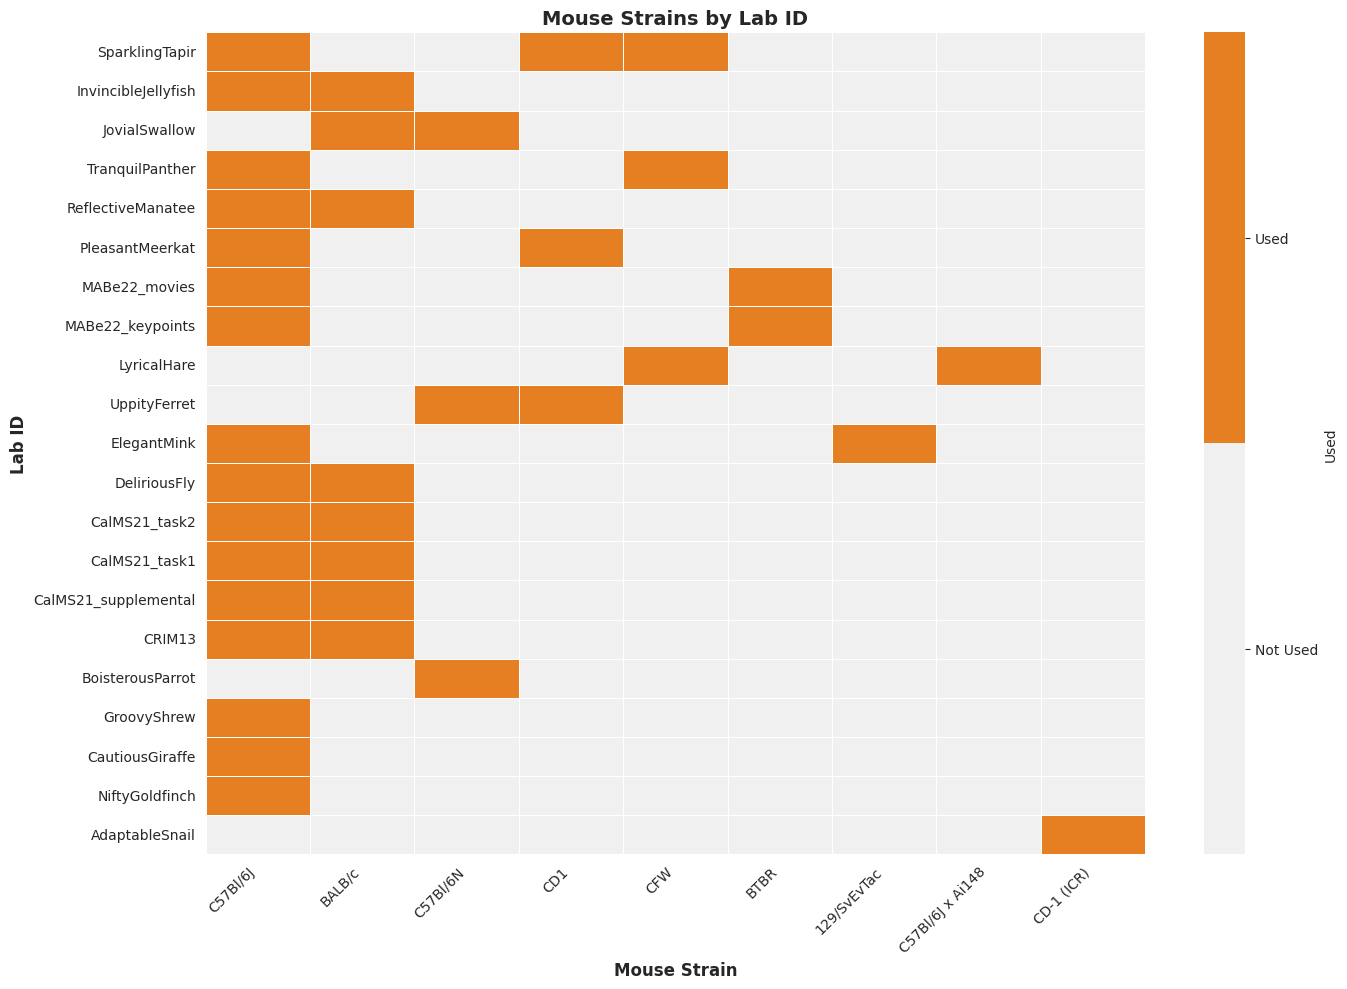

In [69]:
# Build a dataframe with lab_id and mouse strains
lab_strain_data = []

for idx, row in train_df.iterrows():
    lab_id = row['lab_id']
    # Collect strains from all mice (mouse1 through mouse4)
    for i in range(1, 5):
        strain_col = f'mouse{i}_strain'
        if strain_col in row and pd.notna(row[strain_col]) and row[strain_col] != '':
            lab_strain_data.append({'lab_id': lab_id, 'strain': row[strain_col]})
            

# Create dataframe and get unique combinations (1 if used, 0 if not)
lab_strain_df = pd.DataFrame(lab_strain_data)
strain_matrix = lab_strain_df.groupby(['lab_id', 'strain']).size().unstack(fill_value=0)

# Convert to boolean (True if used, False if not)
strain_matrix_bool = (strain_matrix > 0).astype(int)

# Sort columns by total occurrences (descending)
column_sums = strain_matrix_bool.sum(axis=0).sort_values(ascending=False)
strain_matrix_bool = strain_matrix_bool[column_sums.index]

# Sort rows by total occurrences (descending)
row_sums = strain_matrix_bool.sum(axis=1).sort_values(ascending=False)
strain_matrix_bool = strain_matrix_bool.loc[row_sums.index]

# Create custom colormap for binary data (light gray = not used, orange = used)
from matplotlib.colors import ListedColormap
colors = ['#f0f0f0', '#E67E22']  # Light gray for 0, Orange for 1
cmap = ListedColormap(colors)

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(strain_matrix_bool, cmap=cmap, annot=False, fmt='d',
            cbar_kws={'label': 'Used', 'ticks': [0.25, 0.75]},
            linewidths=0.5, linecolor='white', vmin=0, vmax=1)

# Customize colorbar labels
colorbar = plt.gca().collections[0].colorbar
colorbar.set_ticklabels(['Not Used', 'Used'])

plt.xlabel('Mouse Strain', fontsize=12, fontweight='bold')
plt.ylabel('Lab ID', fontsize=12, fontweight='bold')
plt.title('Mouse Strains by Lab ID', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Summary